In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
dataSet = pd.read_csv("Smarket2.csv")
print("Task 2:\n",dataSet.head())

Task 2:
    Unnamed: 0  Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  \
0           1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959   
1           2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032   
2           3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623   
3           4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614   
4           5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213   

  Direction  
0        Up  
1        Up  
2      Down  
3        Up  
4        Up  


In [3]:
print("Task 3:\n",dataSet.shape)

Task 3:
 (1250, 10)


In [4]:
x_features = dataSet[["Lag1", "Lag2"]]
y_labels = dataSet["Direction"].values
print("Task 4:\n",x_features)
print("\n",y_labels)

Task 4:
        Lag1   Lag2
0     0.381 -0.192
1     0.959  0.381
2     1.032  0.959
3    -0.623  1.032
4     0.614 -0.623
...     ...    ...
1245  0.422  0.252
1246  0.043  0.422
1247 -0.955  0.043
1248  0.130 -0.955
1249 -0.298  0.130

[1250 rows x 2 columns]

 ['Up' 'Up' 'Down' ... 'Up' 'Down' 'Down']


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x_features, y_labels, test_size=0.2, random_state=1, stratify=y_labels)
print("Task 5:\n", x_train.head())

Task 5:
       Lag1   Lag2
156  0.696 -1.208
102 -1.055  1.299
301  0.535  0.585
100  0.511  0.386
940 -0.753 -0.998


In [8]:
k_nn = KNeighborsClassifier(n_neighbors = 3)
k_nn.fit(x_train, y_train)
arr_pred = k_nn.predict(x_test)
print("Task 6:\n")
print(k_nn.score(x_test, y_test)) # using two different methods of testing accuracy 
print(accuracy_score(y_test, arr_pred))

Task 6:

0.52
0.52


Task 7:



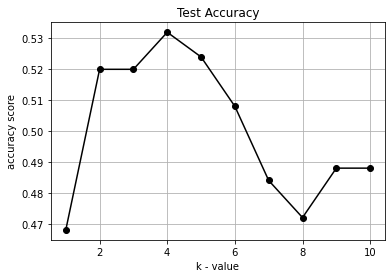

In [7]:
arr = [None] * 10
k_arr = list(range(1,11))
for i in k_arr:
    k_nn = KNeighborsClassifier(n_neighbors=i+1)
    k_nn.fit(x_train, y_train)
    arr[i-1] = k_nn.score(x_test, y_test)
print("Task 7:\n")
plt.plot(k_arr, arr, '-ok')
plt.xlabel("k - value")
plt.ylabel("accuracy score")
plt.title("Test Accuracy")
plt.grid()
plt.show()